In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import neurokit2 as nk
from scipy import fftpack

In [108]:
def rate_hieusuat(lable, pred=None, xacsuat=None):
    confusion = confusion_matrix( lable, pred)
    accuracy = accuracy_score(lable , pred)
    precision = precision_score(lable , pred)
    recall = recall_score(lable , pred)
    f1 = f1_score(lable,pred)   
     
    roc_auc = roc_auc_score(lable, xacsuat)
    print('confusion matrix')
    print(confusion)

    # ROC-AUC print 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion

In [114]:
import numpy as np
from scipy import signal

def is_ecg(ecg_data, sampling_frequency=1000, segment_length=1024,
           min_frequency=0.5, max_frequency=150, amplitude_threshold=0.1,
           min_ecg_components=3):
    """
    This function analyzes a given ECG data segment to determine if it likely represents
    a true Electrocardiogram (ECG) signal.

    Args:
        ecg_data (np.ndarray): A one-dimensional NumPy array containing the ECG data segment.
        sampling_frequency (int, optional): The sampling frequency of the ECG data in Hz. Defaults to 1000.
        segment_length (int, optional): The length of individual segments used for frequency analysis. Defaults to 1024.
        min_frequency (float, optional): The minimum frequency (Hz) considered characteristic of ECG signals. Defaults to 0.5.
        max_frequency (float, optional): The maximum frequency (Hz) considered characteristic of ECG signals. Defaults to 150.
        amplitude_threshold (float, optional): The minimum amplitude threshold for a frequency component to be considered relevant. Defaults to 0.1.
        min_ecg_components (int, optional): The minimum number of characteristic frequency components required for an ECG classification. Defaults to 3.

    Returns:
        str: "Yes" if the data segment is classified as an ECG, "No" otherwise.

    Raises:
        ValueError: If the input data segment is empty.
    """

    if len(ecg_data) == 0:
        raise ValueError("Input data segment cannot be empty.")

    # Handle data length exceptions and create segments for analysis (code remains the same)

    # Standardize the data (optional, potentially beneficial for certain algorithms)
    # ecg_data_std = (ecg_data - np.mean(ecg_data)) / np.std(ecg_data)

    # Employ Welch's method with Hann window for robust spectral analysis
    frequencies = []
    amplitudes = []
    for segment in segments:
        f, Pxx = signal.welch(segment, fs=sampling_frequency, window='hann', nperseg=segment_length)
        frequencies.append(f)
        amplitudes.append(Pxx)

    # Identify frequency components characteristic of ECG signals
    ecg_frequencies = []
    for i in range(len(frequencies)):
        ecg_f = [f for f, a in zip(frequencies[i], amplitudes[i])
                  if min_frequency <= f <= max_frequency and a > amplitude_threshold]
        ecg_frequencies.append(ecg_f)

    # Determine the presence of sufficient ECG components
    is_ecg = any(len(f) >= min_ecg_components for f in ecg_frequencies)

    return "Yes" if is_ecg else "No"

# Example usage (remains the same)


In [110]:
data = pd.read_csv('ecg.csv', header=None)
# print(data)
# raw = data.values
data.head().style.set_properties(**{'background-color': 'black', 'color': 'white', 'border-color': 'white'})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,-0.493223,-0.463052,-0.301644,-0.232734,-0.125055,-0.153943,-0.024357,-0.065609,0.034999,0.061935,0.071195,0.123925,0.103124,0.225228,0.128683,0.302483,0.257276,0.196352,0.179383,0.244729,0.341217,0.328204,0.406042,0.446605,0.424068,0.481512,0.477844,0.624083,0.574585,0.598013,0.564592,0.607979,0.620635,0.656253,0.684748,0.694273,0.665584,0.575796,0.638135,0.614917,0.569083,0.468576,0.442818,0.468274,0.432493,0.407958,0.418623,0.362531,0.410959,0.471666,0.372167,0.337875,0.221405,0.273997,0.298664,0.263564,0.342564,0.419505,0.586607,0.860624,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.000000
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,-0.206160,-0.224480,-0.048684,-0.019621,0.094805,0.116786,0.185186,0.230526,0.138027,0.244426,0.271695,0.259003,0.269202,0.127065,0.202073,0.255983,0.153115,0.210216,0.191082,0.190927,0.210510,0.207108,0.204888,0.200865,0.346920,0.348002,0.254537,0.331975,0.356690,0.349930,0.430380,0.467502,0.486063,0.403188,0.478956,0.397392,0.464120,0.451795,0.361361,0.379831,0.342785,0.399107,0.387508,0.255703,0.284034,0.284993,0.250108,0.173036,0.149423,0.141685,0.222261,0.172847,0.150779,0.176566,0.280942,0.489939,0.660889,0.893193,1.026997,1.202394,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.000000
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,-0.438023,-0.436248,-0.400114,-0.134987,-0.239347,-0.120244,-0.001971,0.285000,0.315646,0.107364,0.109521,0.158078,0.291898,0.261294,0.188407,0.140651,0.263365,0.287207,0.314317,0.177942,0.138290,0.321069,0.458168,0.251916,0.261353,0.277488,0.298793,0.459075,0.419147,0.520509,0.537761,0.603211,0.475634,0.521693,0.735248,0.729541,0.718523,0.498433,0.545441,0.604827,0.521296,0.394381,0.405020,0.597563,0.531130,0.377651,0.467701,0.457569,0.341116,0.407913,0.459127,0.403937,0.298191,0.46110

0      0.800232
1     -0.874252
2     -2.384761
3     -3.973292
4     -4.338224
         ...   
135    1.277392
136    0.960304
137    0.971020
138    1.614392
139    1.421456
Name: 4, Length: 140, dtype: float64
[ 0.80023202 -0.87425189 -2.3847613  ...  0.97101956  1.6143924
  1.4214563 ]


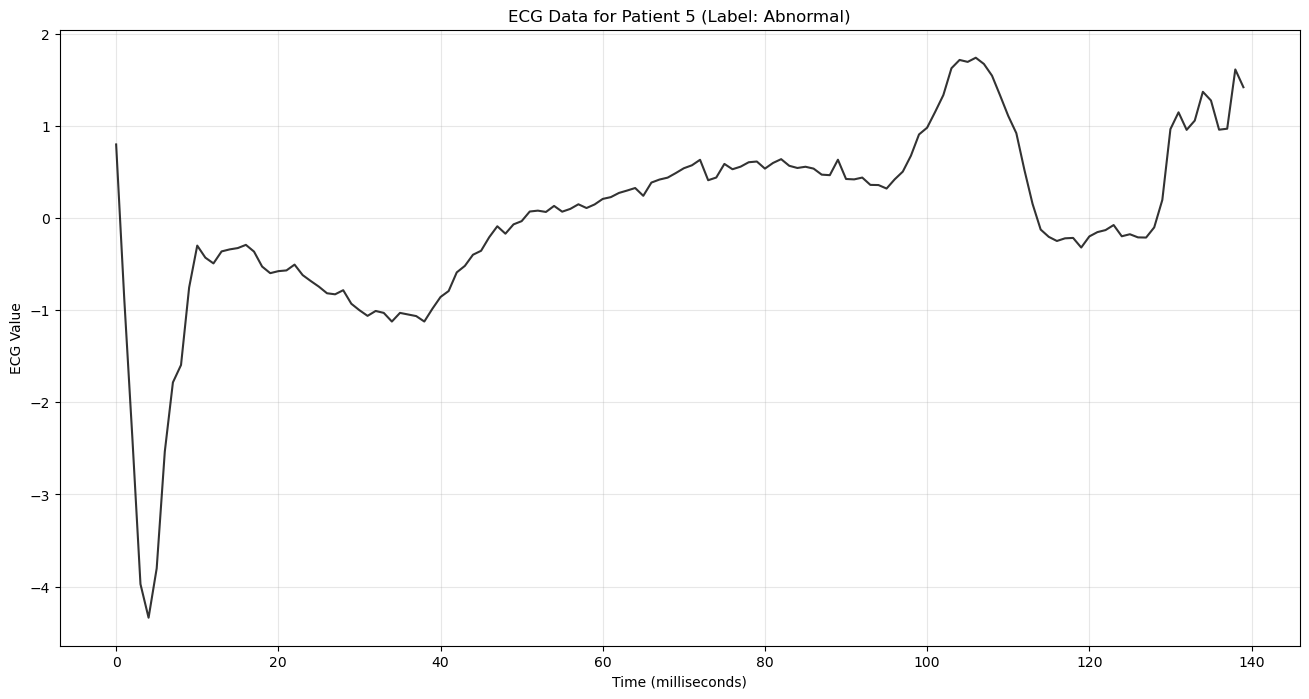

In [119]:
data = pd.read_csv('ecg.csv', header=None)
# Extract ECG data points from columns 0 to 139
ecg_data = data.iloc[:, :140]

# Extract the label column
labels = data.iloc[:, 140]

# Plot ECG data for the first patient (you can modify this part to plot for any patient)
patient_index = 4
ecg_values = ecg_data.iloc[patient_index]
ecg_array = ecg_values.values
ecg_array = np.tile(ecg_array, 358)

print(ecg_values)
print(ecg_array)

# Concatenate the series vertically 10 times
a = pd.concat([ecg_values] * 1, ignore_index=True)

label = labels.iloc[patient_index]

plt.figure(figsize=(16, 8))
plt.plot(a, alpha=0.8, c='black')
plt.grid(alpha=0.3, axis='both')  # Set grid lines to be transparent
plt.title(f'ECG Data for Patient {patient_index + 1} (Label: {"Normal" if label == 0 else "Abnormal"})')
plt.xlabel('Time (milliseconds)')
plt.ylabel('ECG Value')
plt.show()

In [115]:
print(ecg_values)
result = is_ecg(ecg_values)
print(f"Kết quả: {result}")

0     -0.567088
1     -2.593450
2     -3.874230
3     -4.584095
4     -4.187449
         ...   
135   -0.713683
136   -0.532197
137    0.321097
138    0.904227
139   -0.421797
Name: 2, Length: 140, dtype: float64


NameError: name 'segments' is not defined

[-0.56708802 -2.5934502  -3.8742297  ...  0.32109663  0.90422673
 -0.42179659]


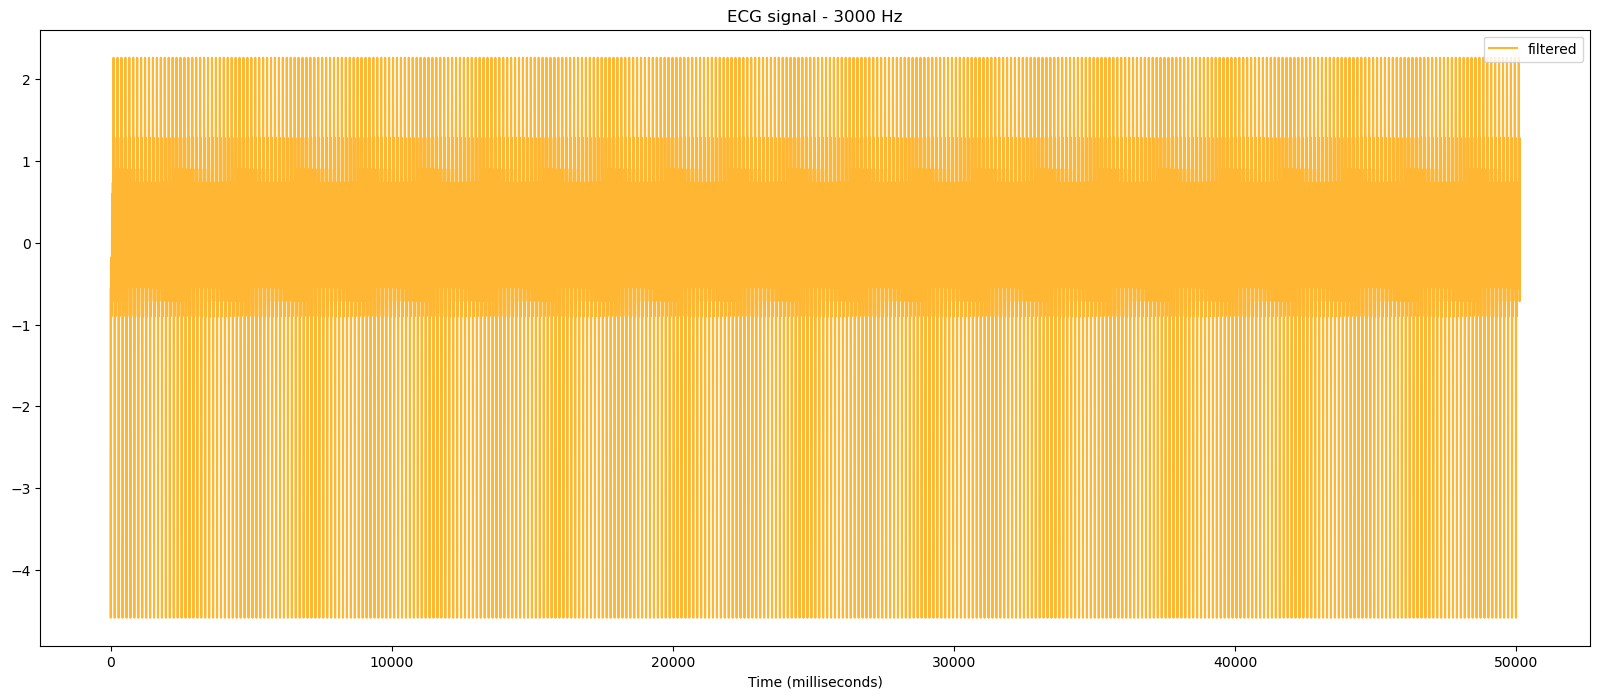

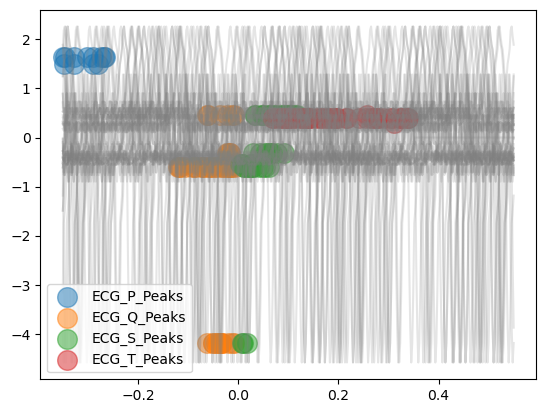

In [ ]:
# Retrieve ECG data from data folder
ecg_signal = nk.data(dataset="ecg_3000hz")
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=1000)
data = ecg_array
# data = nk.data(dataset="ecg_1000hz")
print(data)
# print(len(data))
plt.figure(figsize=(20,8))
plt.title('ECG signal - 3000 Hz')
plt.plot(data, alpha = 0.8, c='orange')
plt.gca().legend(('filtered','raw signal'))
plt.xlabel('Time (milliseconds)')
plt.show()

signal_dwt, waves_dwt = nk.ecg_delineate(data, 
                                        rpeaks, 
                                        sampling_rate=500, 
                                        method="dwt", 
                                        show=True, 
                                        show_type='peaks')

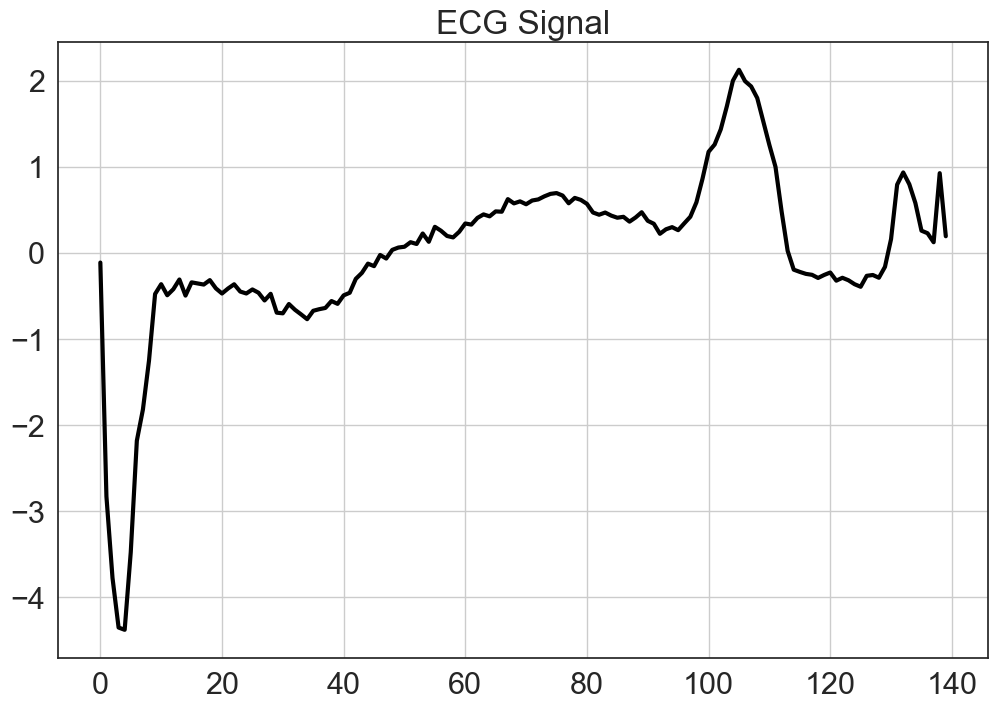

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the whole dataset
file = pd.read_csv("ecg.csv", header = None)
data = file.loc[:, 0:len(file.columns) - 2]
labels = file.loc[:, len(file.columns) - 1]
signal = data.iloc[np.random.randint(0, len(data))].to_list()

# Read single ECG input csv
single_ecg = pd.read_csv("not_ecg.csv", header = None)
single_data = file.iloc[:, :-1]
signal = single_data.values.tolist()[0]

# Plot
plt.figure(figsize = (12, 8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(signal,color='black',linewidth=3.0)
plt.title('ECG Signal')
plt.grid(True)
plt.show()